In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# Create linearly separable binary classification data
np.random.seed(1)
X = np.random.randn(100, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int).reshape(-1, 1)

In [6]:
# Add bias
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [7]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
# Initialize
theta = np.zeros((X_b.shape[1], 1))
lr = 0.1
epochs = 1000

In [9]:
# Training
for epoch in range(epochs):
    z = X_b @ theta
    predictions = sigmoid(z)
    gradient = X_b.T @ (predictions - y) / len(y)
    theta -= lr * gradient

In [10]:
# Accuracy
preds = sigmoid(X_b @ theta) >= 0.5
acc = (preds == y).mean()

print("Accuracy (Logistic Regression from scratch):", acc)


Accuracy (Logistic Regression from scratch): 0.98


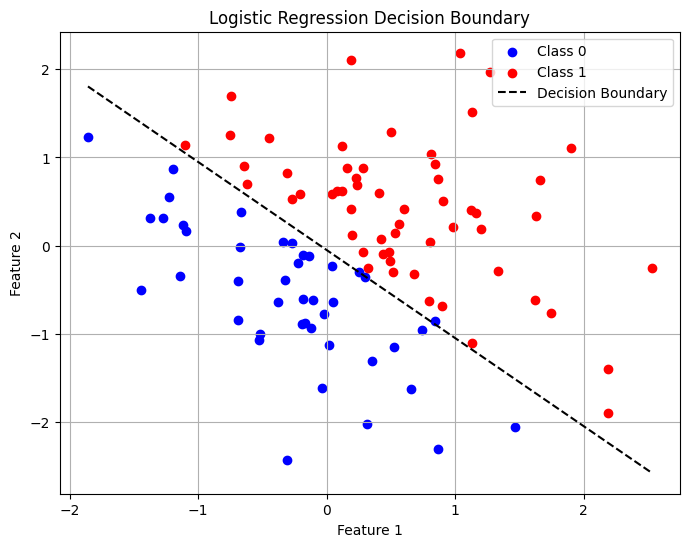

In [11]:
# Plotting data points
plt.figure(figsize=(8, 6))
plt.scatter(X[y.ravel() == 0, 0], X[y.ravel() == 0, 1], color='blue', label='Class 0')
plt.scatter(X[y.ravel() == 1, 0], X[y.ravel() == 1, 1], color='red', label='Class 1')

# Decision boundary
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
# Solve for x2 using theta0 + theta1*x1 + theta2*x2 = 0 => x2 = -(theta0 + theta1*x1)/theta2
x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]

plt.plot(x1_vals, x2_vals, 'k--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()